Import all the required libraries

In [36]:
import pandas as pd
import math
import pandas_datareader as web
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

fetch the dataset from the yahoo finance library

In [23]:
df_stock = yf.download('AAPL', start='2012-01-01', end='2023-12-30')

[*********************100%***********************]  1 of 1 completed


In [24]:
#display
df_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402625,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469282,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607715,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739514,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719305,394024400
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868134,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700


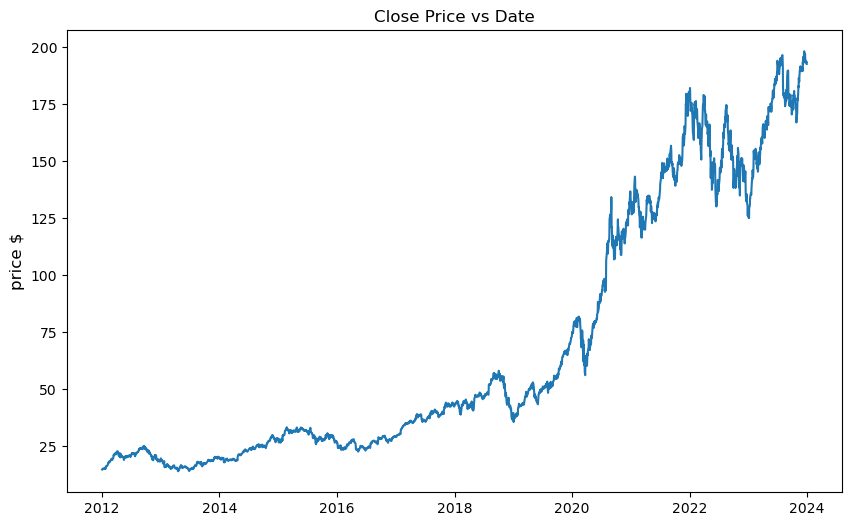

In [17]:
#plot Close Price
plt.figure(figsize=(10,6))
plt.plot(df_stock.Close)
plt.title("Close Price vs Date")
plt.ylabel("price $", fontsize=12)
plt.show()

In [25]:
df_stock = df_stock.drop('Adj Close', axis = 1)
df_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,394024400


Spliting the dataset into training (70%) and testing (30%) set

In [27]:
# Splitting data into training and testing

train = pd.DataFrame(df_stock[0:int(len(df_stock)*0.70)])
test = pd.DataFrame(df_stock[int(len(df_stock)*0.70): int(len(df_stock))])

In [28]:
print(train.shape)
print(test.shape)

(2112, 5)
(906, 5)


Using MinMax scaler for normalization of the dataset

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

create train dataset

In [30]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.17579087],
       [0.14690088],
       [0.15460117],
       ...,
       [0.03918799],
       [0.02488937],
       [0.05481997]])

In [31]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])


In [33]:
x_train, y_train = np.array(x_train), np.array(y_train) 
x_train.shape, y_train.shape

((2012, 100, 1), (2012,))

create test dataset

In [45]:
data_test_array = scaler.fit_transform(test_close)
data_test_array

array([[0.25378195],
       [0.31263516],
       [0.36964987],
       [0.16198905],
       [0.18154892],
       [0.22964756],
       [0.18131369],
       [0.32316819],
       [0.20442036],
       [0.353035  ],
       [0.40710243],
       [0.5070509 ],
       [0.5027219 ],
       [0.32761709],
       [0.40361159],
       [0.25795337],
       [0.20774904],
       [0.68637052],
       [0.31801472],
       [0.53700678],
       [0.48124589],
       [0.32394469],
       [0.51731216],
       [0.30431402],
       [0.33165491],
       [0.24747858],
       [0.25691195],
       [0.27008395],
       [0.25229518],
       [0.2656202 ],
       [0.29003093],
       [0.18901249],
       [0.47846532],
       [0.41948537],
       [0.36869523],
       [0.24702295],
       [0.19452109],
       [0.18918606],
       [0.22662719],
       [0.18542801],
       [0.49375329],
       [0.46073594],
       [0.27738764],
       [0.22717646],
       [0.18921803],
       [0.38277506],
       [1.        ],
       [0.811

In [46]:
x_test = []
y_test = [] 

for i in range(100, data_test_array.shape[0]):
    x_test.append(data_test_array[i-100: i])
    y_test.append(data_test_array[i, 0])

In [48]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(806, 100, 1)
(806,)


Build Model (LSTM)

In [63]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\gimep\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the model

In [64]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])

In [65]:
model.fit(x_train, y_train, epochs = 30)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - MAE: 0.0793 - loss: 0.0150
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - MAE: 0.0532 - loss: 0.0068
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - MAE: 0.0487 - loss: 0.0060
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - MAE: 0.0494 - loss: 0.0065
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - MAE: 0.0507 - loss: 0.0062
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - MAE: 0.0494 - loss: 0.0055
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - MAE: 0.0500 - loss: 0.0058
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - MAE: 0.0492 - loss: 0.0061
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - MAE: 0.0477 - loss: 0.0052
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - MAE: 0.0494 - loss: 0.0056
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - MAE: 0.0498 - loss: 0.0056
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - MAE: 0.0494 - loss: 0.0057
Epoch 13/30
63/63 ━━━━━

In [71]:
#predict test data
predictions = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [73]:
rmse=np.sqrt(np.mean((predictions- y_test)**2))

In [74]:
#value of error
rmse

0.09666006197082963

plotting the graph of predicted vs actual values

In [77]:
scale_factor = 1/0.00985902
predictions = predictions * scale_factor
y_test = y_test * scale_factor

In [81]:
train_vis = y_train * scale_factor

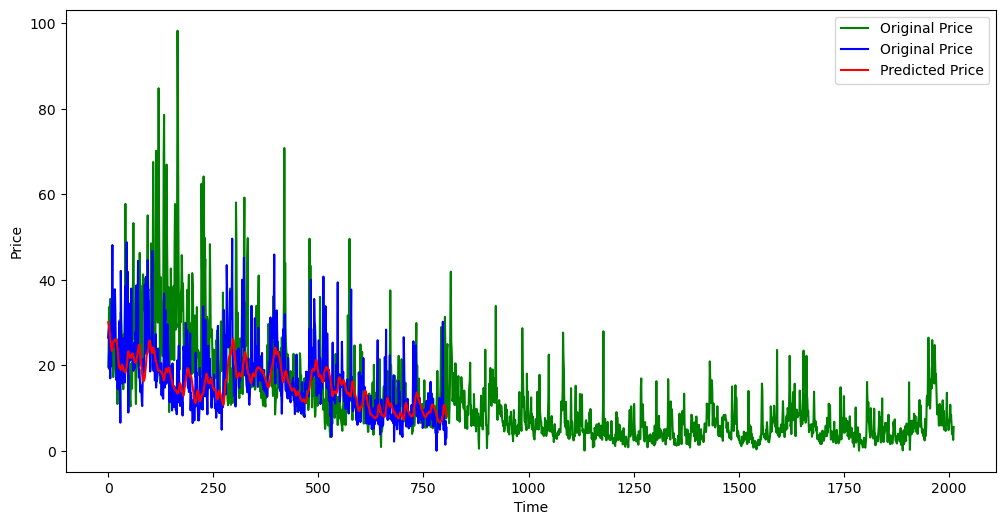

In [82]:
plt.figure(figsize = (12,6))
plt.plot(train_vis, 'g', label = "Original Price")
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(predictions, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Model evaluation

In [85]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.777223846140871
